# CS613 HW#1
# Xiangang Lai


# Part 1
## 1.
### (a)

In [265]:
import numpy as np
x = [[1, -2],
     [1, -5],
     [1, -3],
     [1, 0],
     [1, -6],
     [1, -2],
     [1, 1],
     [1, 5],
     [1, -1],
     [1, 3]]
y=[1, -4, 1, 3,11,5,0,-1,-3,1 ]
x= np.asarray(x)
xT = np.transpose(x)
y = np.asarray(y)
theta = np.linalg.inv(xT.dot(x)).dot(xT.dot(y))
print(theta)

[ 0.95769231 -0.44230769]


### (b)

In [266]:
# check with sklearn.linearmodel
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x, y)
print(reg.intercept_)
print(reg.coef_[1])

0.9576923076923074
-0.44230769230769246


The results obtained agree very well.

## 2. 
### (c)

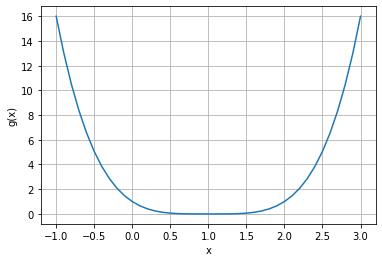

In [267]:
import matplotlib.pyplot as plt
def g(x):
    return (x-1)**4
    
x = np.arange(-1, 3.1, 0.1)

plt.figure()
plt.plot(x, g(x))
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True)
plt.savefig('images\Q1.jpg')
plt.show()

# Part 2

In [4]:
# read the data
import pandas as pd
df = pd.read_csv('x06Simple.csv',index_col=0,header=0)
data = df.values

# prepare the data
import numpy as np
np.random.seed(0)
np.random.shuffle(data)
idx = int(np.round(len(data)*2/3))
x_train = data[:idx,0:2]
y_train = data[:idx,2]
x_test = data[idx:,0:2]
y_test = data[idx:,2]

# standardize the train data
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0,ddof=1)
x_train_S = (x_train-mean)/std
x_train_S = np.insert(x_train_S,0,np.ones(len(x_train_S)),axis=1) # add bias term

# compute the closed form solution
x_train_S_T = np.transpose(x_train_S)
theta = np.linalg.inv(x_train_S_T.dot(x_train_S)).dot(x_train_S_T.dot(y_train))
print("The coeffieinets are: "+ str(theta))

# apply to the testing data
x_test_S = (x_test-mean)/std
x_test_S = np.insert(x_test_S,0,np.ones(len(x_test_S)),axis=1) # add bias term
y_test_predicted = x_test_S.dot(theta)
RMSE = np.sqrt((y_test-y_test_predicted).dot(y_test-y_test_predicted)/len(y_test))
print("The RMSE is: "+str(RMSE))


The coeffieinets are: [3343.27586207 1036.63016523 -295.66859639]
The RMSE is: 653.7601025967209


In [4]:
x_train

array([[125,  29],
       [ 69,  31],
       [ 83,  29],
       [ 69,  25],
       [153,  25],
       [ 55,  29],
       [ 97,  29],
       [ 14,  27],
       [ 83,  31],
       [139,  29],
       [111,  29],
       [139,  27],
       [125,  31],
       [ 41,  25],
       [153,  31],
       [111,  27],
       [ 69,  27],
       [ 14,  29],
       [ 83,  27],
       [111,  31],
       [125,  25],
       [ 41,  27],
       [ 83,  25],
       [ 97,  27],
       [153,  29],
       [ 55,  27],
       [ 41,  31],
       [111,  25],
       [ 28,  31]], dtype=int64)

# Part 3

In [3]:
# read the data
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
df = pd.read_csv('x06Simple.csv',index_col=0,header=0)
data = df.values

# set the number of testing and number of Folds
num_test = 20
num_S = 80

RMSEs = []
for ii in range(num_test):
    np.random.seed(ii)  # assign different seeds for each test
    np.random.shuffle(data)

    kf = KFold(n_splits=num_S)
    SEs = []
    for train_idx, test_idx in kf.split(data):
        # prepare the data
        x_train = data[train_idx,0:2]
        y_train = data[train_idx,2]
        x_test = data[test_idx,0:2]
        y_test = data[test_idx,2]

        # standardize the train data
        mean = np.mean(x_train,axis=0)
        std = np.std(x_train,axis=0,ddof=1)
        x_train_S = (x_train-mean)/std
        x_train_S = np.insert(x_train_S,0,np.ones(len(x_train_S)),axis=1) # add bias term

        # compute the closed form solution
        x_train_S_T = np.transpose(x_train_S)
        theta = np.linalg.inv(x_train_S_T.dot(x_train_S)).dot(x_train_S_T.dot(y_train))

        # apply to the testing data
        x_test_S = (x_test-mean)/std
        x_test_S = np.insert(x_test_S,0,np.ones(len(x_test_S)),axis=1) # add bias term
        
        y_test_predicted = x_test_S.dot(theta)
        SE = (y_test-y_test_predicted).dot(y_test-y_test_predicted)
        SEs.append([SE,len(y_test)]) # save the square errors and number of testing sample

    RMSE = np.sqrt(np.sum(SEs,axis=0)[0]/np.sum(SEs,axis=0)[1])
    RMSEs.append(RMSE)
mean = np.mean(RMSEs,axis=0)
std = np.std(RMSEs,axis=0)
print("The mean is: "+str(mean))
print("The std is: "+str(std))

ValueError: Cannot have number of splits n_splits=80 greater than the number of samples: n_samples=44.

# Part 4

In [270]:
# read the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('x06Simple.csv',index_col=0,header=0)
data = df.values

# prepare the data
np.random.seed(0)
np.random.shuffle(data)
x_train, x_test, y_train, y_test = train_test_split(
    data[:,0:2],data[:,2],train_size = 2/3)

# standardize the train data and testing data
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0,ddof=1)
x_train_S = (x_train-mean)/std
x_train_S = np.insert(x_train_S,0,np.ones(len(x_train_S)),axis=1) # add bias term
x_train_S_T = np.transpose(x_train_S)
x_test_S = (x_test-mean)/std
x_test_S = np.insert(x_test_S,0,np.ones(len(x_test_S)),axis=1) # add bias term
SEs = []
for idx,test in enumerate(x_test_S):
    beta = []
    k=1
    for train in x_train_S:
        beta.append(np.exp(-sum(abs(test-train))/(k**2)))
    W = np.diag(beta)
    
    # compute the Locally Weighted Regression
    theta = np.linalg.inv(x_train_S_T.dot(W).dot(x_train_S))\
            .dot(x_train_S_T).dot(W).dot(y_train)

    # apply to the testing data and calculate SE
    test_predicted = test.dot(theta)
    SEs.append((y_test[idx]-test_predicted)**2)

RMSE = np.sqrt(np.sum(SEs)/len(SEs)) 
RMSE

394.09370283577687

# Part 5

The final model  theta values is: [3060.4137931  1282.67183074 -252.2763165 ]
The final RMSE value is: 576.1462877627042


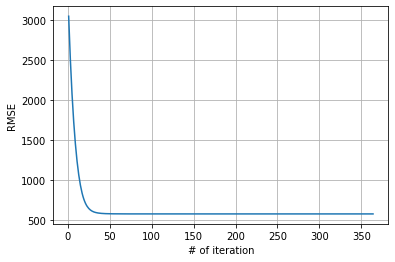

In [4]:
# read the data
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('x06Simple.csv',index_col=0,header=0)
data = df.values

# prepare the data
np.random.seed(0)
np.random.shuffle(data)
x_train, x_test, y_train, y_test = train_test_split(
    data[:,0:2],data[:,2],train_size = 2/3)

# standardize the train data and testing data
mean = np.mean(x_train,axis=0)
std = np.std(x_train,axis=0,ddof=1)
x_train_S = (x_train-mean)/std
x_train_S = np.insert(x_train_S,0,np.ones(len(x_train_S)),axis=1) # add bias term
x_train_S_T = np.transpose(x_train_S)
x_test_S = (x_test-mean)/std
x_test_S = np.insert(x_test_S,0,np.ones(len(x_test_S)),axis=1)

# Gradient Descent algorithm
iter_num = 1
RMSE_diff = 1
RMSEs = []
theta = 2*(np.random.rand(np.shape(x_train_S)[1])-0.5) # initialize with a aryay in [-1 1]

while iter_num <1000 and RMSE_diff>2e-23:
    # update theta
    theta = theta - 0.01/len(x_train_S_T)*x_train_S_T.dot(x_train_S.dot(theta)-y_train)
    # apply to the testing data and calculate SE
    y_test_predicted = x_test_S.dot(theta)
    SE = (y_test-y_test_predicted).dot(y_test-y_test_predicted)
    RMSE = np.sqrt(SE/len(y_test))
    if iter_num==1:
        RMSE_diff = RMSE
    else:
        RMSE_diff = abs((RMSE - RMSEs[-1])/RMSE)

    RMSEs.append(RMSE)
    iter_num += 1

print('The final model  theta values is: '+str(theta))
print('The final RMSE value is: '+str(RMSE))

plt.figure()
plt.plot(range(1,iter_num), RMSEs)
plt.xlabel('# of iteration')
plt.ylabel('RMSE')
plt.grid(True)
plt.savefig('images\Q5.jpg')
plt.show()